In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('all_reviews.csv')

In [3]:
df

,Movie_Name,Year,Reviews
0,Boyhood,2014,"["" Like Michael Apted in his Seven Up! documen..."
1,The Babadook,2014,[' A deftly inventive and psychologically char...
2,The LEGO Movie,2014,"[' The movie is a wonderful surprise, cleverly..."
3,Nightcrawler,2014,[' Like an alternate version of Network in whi...
4,Life Itself,2014,"["" With Ebert's blessing and encouragement, Li..."
5,Whiplash,2014,[' Revealing both the dangers and payoffs of a...
6,Birdman,2014,"[' Birdman, more than most, seems a film that ..."
7,Mr. Turner,2014,"["" Mike Leigh's biopic is so richly detailed t..."
8,"Two Days, One Night",2014,"["" Consider Marion Cotillard's Oscar-nominated..."
9,Gloria,2014,"["" We don't make movies in America like Gloria..."


In [4]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy.misc import imread
import seaborn as sns

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


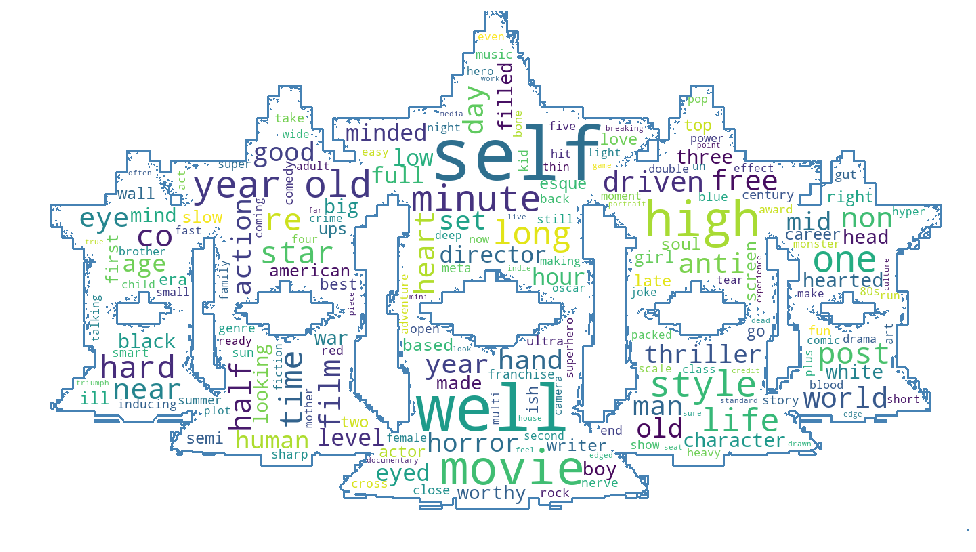

In [5]:
import nltk
from wordcloud import WordCloud, STOPWORDS
review=df['Reviews'].str.lower().str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(review)
word_dist = nltk.FreqDist(words)
stopwords = nltk.corpus.stopwords.words('english')
origin_image = imread("Reviews.jpg")
origin_mask = origin_image
words_without_stop = nltk.FreqDist(w for w in words if w not in stopwords) 
wc = WordCloud(stopwords=STOPWORDS,background_color='white',mask=origin_mask, contour_width=3, 
               contour_color='steelblue').generate(" ".join(words_without_stop))
plt.imshow(wc)
fig=plt.gcf()
fig.set_size_inches(15,10)
plt.axis('off')
plt.show()

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
import os

In [7]:
def get_pos_neg_words():
    def get_words(url):
        import requests
        words = requests.get(url).content.decode('latin-1')
        word_list = words.split('\n')
        index = 0
        while index < len(word_list):
            word = word_list[index]
            if ';' in word or not word:
                word_list.pop(index)
            else:
                index+=1
        return word_list

    #Get lists of positive and negative words
    p_url = 'http://ptrckprry.com/course/ssd/data/positive-words.txt'
    n_url = 'http://ptrckprry.com/course/ssd/data/negative-words.txt'
    positive_words = get_words(p_url)
    negative_words = get_words(n_url)
    return positive_words,negative_words

positive_words,negative_words = get_pos_neg_words()

In [8]:
rev=df['Reviews']
def do_pos_neg_sentiment_analysis(text_rev,debug=False):
    positive_words,negative_words = get_pos_neg_words()
    from nltk import word_tokenize
    results = list()
    for text in text_rev:
        cpos = cneg = lpos = lneg = 0
        for word in word_tokenize(text):
            if word in positive_words:
                if debug:
                    print("Positive",word)
                cpos+=1
            if word in negative_words:
                if debug:
                    print("Negative",word)
                cneg+=1
        results.append((cpos/len(word_tokenize(text)),cneg/len(word_tokenize(text))))
    return results

do_pos_neg_sentiment_analysis(rev)

[(0.050936768149882905, 0.0117096018735363),
 (0.03663613655287261, 0.044962531223980015),
 (0.06025824964131994, 0.024390243902439025),
 (0.04553624925104853, 0.04313960455362492),
 (0.05665930831493746, 0.01913171449595291),
 (0.03663423010875787, 0.027475672581568404),
 (0.05685218432076601, 0.02573309395571514),
 (0.05439005439005439, 0.028749028749028748),
 (0.043429844097995544, 0.02783964365256125),
 (0.04154302670623145, 0.028684470820969338),
 (0.05235602094240838, 0.035153328347045626),
 (0.050696378830083565, 0.024512534818941504),
 (0.046788990825688076, 0.05412844036697248),
 (0.05467625899280575, 0.04460431654676259),
 (0.06598240469208211, 0.01906158357771261),
 (0.05456453305351522, 0.026232948583420776),
 (0.050087361677344205, 0.021549213744903904),
 (0.0570944036178632, 0.02035048049745619),
 (0.054, 0.017),
 (0.06240713224368499, 0.017830609212481426),
 (0.030390738060781478, 0.04775687409551375),
 (0.041945288753799395, 0.02492401215805471),
 (0.04380242311276794, 

In [9]:
len(do_pos_neg_sentiment_analysis(rev))

500

In [25]:
pos_neg_list=do_pos_neg_sentiment_analysis(rev)
df_sub = pd.DataFrame(columns=['positive','negative'])
for i in range(len(pos_neg_list)):
    df_sub.loc[i,'positive']=pos_neg_list[i][0]
    df_sub.loc[i,'negative']=pos_neg_list[i][1]

In [26]:
df_sub

,positive,negative
0,0.0509368,0.0117096
1,0.0366361,0.0449625
2,0.0602582,0.0243902
3,0.0455362,0.0431396
4,0.0566593,0.0191317
5,0.0366342,0.0274757
6,0.0568522,0.0257331
7,0.0543901,0.028749
8,0.0434298,0.0278396
9,0.041543,0.0286845


In [28]:
pd.concat([df, df_sub], axis=1)

,Movie_Name,Year,Reviews,positive,negative
0,Boyhood,2014,"["" Like Michael Apted in his Seven Up! documen...",0.0509368,0.0117096
1,The Babadook,2014,[' A deftly inventive and psychologically char...,0.0366361,0.0449625
2,The LEGO Movie,2014,"[' The movie is a wonderful surprise, cleverly...",0.0602582,0.0243902
3,Nightcrawler,2014,[' Like an alternate version of Network in whi...,0.0455362,0.0431396
4,Life Itself,2014,"["" With Ebert's blessing and encouragement, Li...",0.0566593,0.0191317
5,Whiplash,2014,[' Revealing both the dangers and payoffs of a...,0.0366342,0.0274757
6,Birdman,2014,"[' Birdman, more than most, seems a film that ...",0.0568522,0.0257331
7,Mr. Turner,2014,"["" Mike Leigh's biopic is so richly detailed t...",0.0543901,0.028749
8,"Two Days, One Night",2014,"["" Consider Marion Cotillard's Oscar-nominated...",0.0434298,0.0278396
9,Gloria,2014,"["" We don't make movies in America like Gloria...",0.041543,0.0286845


In [31]:
def get_nrc_data():
    nrc = "/Users/scarlett/Desktop/4501 project/Rotten_Tomato_Project/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
    count=0
    emotion_dict=dict()
    with open(nrc,'r') as f:
        all_lines = list()
        for line in f:
            if count < 46:
                count+=1
                continue
            line = line.strip().split('\t')
            if int(line[2]) == 1:
                if emotion_dict.get(line[0]):
                    emotion_dict[line[0]].append(line[1])
                else:
                    emotion_dict[line[0]] = [line[1]]
    return emotion_dict

In [33]:
emotion_dict=get_nrc_data()

In [34]:
def emotion_analyzer(text,emotion_dict=emotion_dict):
    emotions = {x for y in emotion_dict.values() for x in y}
    emotion_count = dict()
    for emotion in emotions:
        emotion_count[emotion] = 0
    total_words = len(text.split())
    for word in text.split():
        if emotion_dict.get(word):
            for emotion in emotion_dict.get(word):
                emotion_count[emotion] += 1/len(text.split())
    return emotion_count

In [45]:
for text in rev:
    result=emotion_analyzer(text)
    print(result)

{'sadness': 0.0035919540229885057, 'surprise': 0.005028735632183908, 'fear': 0.005028735632183908, 'anger': 0.0021551724137931034, 'anticipation': 0.015086206896551716, 'disgust': 0.0007183908045977011, 'joy': 0.018678160919540217, 'negative': 0.009339080459770114, 'positive': 0.04382183908045973, 'trust': 0.018678160919540217}
{'sadness': 0.03437815975733065, 'surprise': 0.020222446916076848, 'fear': 0.03437815975733065, 'anger': 0.025278058645096066, 'anticipation': 0.016177957532861473, 'disgust': 0.022244691607684535, 'joy': 0.016177957532861473, 'negative': 0.05257836198179977, 'positive': 0.03741152679474217, 'trust': 0.016177957532861473}
{'sadness': 0.0035211267605633804, 'surprise': 0.015845070422535214, 'fear': 0.006161971830985915, 'anger': 0.007922535211267605, 'anticipation': 0.017605633802816902, 'disgust': 0.0035211267605633804, 'joy': 0.024647887323943653, 'negative': 0.01672535211267606, 'positive': 0.05017605633802813, 'trust': 0.02200704225352112}
{'sadness': 0.01242

{'sadness': 0.02691065662002151, 'surprise': 0.01937567276641549, 'fear': 0.02152852529601721, 'anger': 0.02368137782561893, 'anticipation': 0.02152852529601721, 'disgust': 0.01722282023681377, 'joy': 0.02045209903121635, 'negative': 0.040904198062432694, 'positive': 0.053821313240043016, 'trust': 0.02475780409041979}
{'sadness': 0.010575793184488836, 'surprise': 0.014101057579318446, 'fear': 0.008225616921269096, 'anger': 0.018801410105757928, 'anticipation': 0.017626321974148058, 'disgust': 0.008225616921269096, 'joy': 0.03055229142185663, 'negative': 0.019976498237367798, 'positive': 0.06227967097532321, 'trust': 0.036427732079905996}
{'sadness': 0.01628664495114007, 'surprise': 0.022801302931596098, 'fear': 0.024429967426710105, 'anger': 0.024429967426710105, 'anticipation': 0.03257328990228014, 'disgust': 0.017915309446254076, 'joy': 0.029315960912052127, 'negative': 0.030944625407166134, 'positive': 0.058631921824104254, 'trust': 0.029315960912052127}
{'sadness': 0.01339285714285

{'sadness': 0.015182186234817808, 'surprise': 0.011133603238866394, 'fear': 0.01923076923076922, 'anger': 0.009109311740890687, 'anticipation': 0.026315789473684195, 'disgust': 0.00708502024291498, 'joy': 0.011133603238866394, 'negative': 0.028340080971659902, 'positive': 0.04655870445344132, 'trust': 0.023279352226720635}
{'sadness': 0.002570694087403599, 'surprise': 0.02570694087403599, 'fear': 0.015424164524421592, 'anger': 0.02313624678663239, 'anticipation': 0.02313624678663239, 'disgust': 0.007712082262210797, 'joy': 0.02056555269922879, 'negative': 0.03084832904884319, 'positive': 0.053984575835475564, 'trust': 0.03084832904884319}
{'sadness': 0.01, 'surprise': 0.007500000000000001, 'fear': 0.012499999999999999, 'anger': 0.01, 'anticipation': 0.012499999999999999, 'disgust': 0.00375, 'joy': 0.016249999999999997, 'negative': 0.013749999999999998, 'positive': 0.04625000000000002, 'trust': 0.02}
{'sadness': 0.02127659574468085, 'surprise': 0.0070921985815602835, 'fear': 0.021276595

{'sadness': 0.0030959752321981426, 'surprise': 0.013931888544891644, 'fear': 0.0108359133126935, 'anger': 0.008513931888544893, 'anticipation': 0.015479876160990716, 'disgust': 0.0023219814241486067, 'joy': 0.01625386996904025, 'negative': 0.015479876160990716, 'positive': 0.04721362229102169, 'trust': 0.022445820433436525}
{'sadness': 0.01916167664670659, 'surprise': 0.010778443113772457, 'fear': 0.009580838323353295, 'anger': 0.008383233532934133, 'anticipation': 0.017964071856287428, 'disgust': 0.0023952095808383233, 'joy': 0.027544910179640725, 'negative': 0.01916167664670659, 'positive': 0.07185628742514966, 'trust': 0.03473053892215569}
{'sadness': 0.014856081708449402, 'surprise': 0.012999071494893226, 'fear': 0.014856081708449402, 'anger': 0.009285051067780875, 'anticipation': 0.021355617455896005, 'disgust': 0.008356545961002788, 'joy': 0.021355617455896005, 'negative': 0.025998142989786435, 'positive': 0.04735376044568247, 'trust': 0.013927576601671314}
{'sadness': 0.02101241

{'sadness': 0.009870918754745633, 'surprise': 0.01518602885345482, 'fear': 0.01518602885345482, 'anger': 0.012908124525436597, 'anticipation': 0.01594533029612756, 'disgust': 0.006074411541381928, 'joy': 0.01594533029612756, 'negative': 0.020501138952164016, 'positive': 0.04707668944571001, 'trust': 0.0220197418375095}
{'sadness': 0, 'surprise': 0.013513513513513514, 'fear': 0.013513513513513514, 'anger': 0.006756756756756757, 'anticipation': 0.02702702702702703, 'disgust': 0, 'joy': 0.016891891891891893, 'negative': 0.016891891891891893, 'positive': 0.05067567567567568, 'trust': 0.016891891891891893}
{'sadness': 0.005822416302765648, 'surprise': 0.008733624454148473, 'fear': 0.01310043668122271, 'anger': 0.005822416302765648, 'anticipation': 0.020378457059679767, 'disgust': 0.004366812227074236, 'joy': 0.020378457059679767, 'negative': 0.02328966521106259, 'positive': 0.04512372634643375, 'trust': 0.030567685589519642}
{'sadness': 0.01128205128205128, 'surprise': 0.01128205128205128, 

{'sadness': 0.019036954087346025, 'surprise': 0.013437849944008958, 'fear': 0.013437849944008958, 'anger': 0.006718924972004479, 'anticipation': 0.02127659574468085, 'disgust': 0.007838745800671893, 'joy': 0.0335946248600224, 'negative': 0.036954087346024636, 'positive': 0.06830907054871224, 'trust': 0.03583426651735722}
{'sadness': 0.011940298507462687, 'surprise': 0.014925373134328358, 'fear': 0.0029850746268656717, 'anger': 0, 'anticipation': 0.026865671641791045, 'disgust': 0, 'joy': 0.03283582089552239, 'negative': 0.008955223880597015, 'positive': 0.07462686567164183, 'trust': 0.014925373134328358}
{'sadness': 0.0060790273556231, 'surprise': 0.0121580547112462, 'fear': 0.0060790273556231, 'anger': 0.00303951367781155, 'anticipation': 0.0182370820668693, 'disgust': 0.004559270516717325, 'joy': 0.013677811550151976, 'negative': 0.025835866261398176, 'positive': 0.044072948328267476, 'trust': 0.016717325227963525}
{'sadness': 0.009029345372460496, 'surprise': 0.01128668171557562, 'f

{'sadness': 0.015030060120240475, 'surprise': 0.0070140280561122245, 'fear': 0.02004008016032064, 'anger': 0.01703406813627254, 'anticipation': 0.01703406813627254, 'disgust': 0.013026052104208413, 'joy': 0.013026052104208413, 'negative': 0.041082164328657335, 'positive': 0.04208416833667337, 'trust': 0.019038076152304607}
{'sadness': 0.019386106623586433, 'surprise': 0.011308562197092083, 'fear': 0.030694668820678526, 'anger': 0.012924071082390952, 'anticipation': 0.017770597738287562, 'disgust': 0.01615508885298869, 'joy': 0.019386106623586433, 'negative': 0.04200323101777062, 'positive': 0.051696284329563844, 'trust': 0.029079159935379656}
{'sadness': 0.023529411764705882, 'surprise': 0.011764705882352941, 'fear': 0.023529411764705882, 'anger': 0.020588235294117647, 'anticipation': 0.014705882352941176, 'disgust': 0.011764705882352941, 'joy': 0.023529411764705882, 'negative': 0.029411764705882353, 'positive': 0.03823529411764706, 'trust': 0.020588235294117647}
{'sadness': 0.03459119

{'sadness': 0.004784688995215311, 'surprise': 0.011961722488038277, 'fear': 0.004784688995215311, 'anger': 0.0023923444976076554, 'anticipation': 0.02392344497607655, 'disgust': 0.004784688995215311, 'joy': 0.031100478468899514, 'negative': 0.011961722488038277, 'positive': 0.05023923444976075, 'trust': 0.031100478468899514}
{'sadness': 0.010909090909090908, 'surprise': 0.007272727272727273, 'fear': 0.00909090909090909, 'anger': 0.010909090909090908, 'anticipation': 0.005454545454545455, 'disgust': 0, 'joy': 0.012727272727272726, 'negative': 0.01636363636363636, 'positive': 0.04363636363636363, 'trust': 0.01636363636363636}
{'sadness': 0.01889763779527559, 'surprise': 0.012598425196850394, 'fear': 0.023622047244094488, 'anger': 0.01889763779527559, 'anticipation': 0.012598425196850394, 'disgust': 0.011023622047244094, 'joy': 0.009448818897637795, 'negative': 0.03622047244094488, 'positive': 0.04409448818897638, 'trust': 0.015748031496062992}
{'sadness': 0.018932874354561105, 'surprise'

{'sadness': 0.02202339986235376, 'surprise': 0.022711631108052317, 'fear': 0.026841018582243654, 'anger': 0.02408809359944943, 'anticipation': 0.021335168616655204, 'disgust': 0.01651754989676531, 'joy': 0.022711631108052317, 'negative': 0.03785271851342055, 'positive': 0.05024088093599456, 'trust': 0.020646937370956648}
{'sadness': 0.008795669824086605, 'surprise': 0.011502029769959407, 'fear': 0.01488497970230041, 'anger': 0.010148849797023006, 'anticipation': 0.023004059539918815, 'disgust': 0.0067658998646820045, 'joy': 0.025033829499323416, 'negative': 0.01623815967523681, 'positive': 0.06630581867388351, 'trust': 0.03450608930987821}
{'sadness': 0.006222222222222222, 'surprise': 0.009777777777777778, 'fear': 0.008, 'anger': 0.006222222222222222, 'anticipation': 0.019555555555555562, 'disgust': 0.002666666666666667, 'joy': 0.027555555555555576, 'negative': 0.013333333333333332, 'positive': 0.05777777777777785, 'trust': 0.021333333333333343}
{'sadness': 0.00796812749003984, 'surpri

{'sadness': 0.008293020041465102, 'surprise': 0.015203870076019347, 'fear': 0.008293020041465102, 'anger': 0.005528680027643401, 'anticipation': 0.023496890117484442, 'disgust': 0.008293020041465102, 'joy': 0.022114720110573593, 'negative': 0.015894955079474773, 'positive': 0.043538355217691754, 'trust': 0.019350380096751895}
{'sadness': 0.019444444444444445, 'surprise': 0.008333333333333333, 'fear': 0.025, 'anger': 0.01388888888888889, 'anticipation': 0.016666666666666666, 'disgust': 0.011111111111111112, 'joy': 0.02777777777777778, 'negative': 0.025, 'positive': 0.05555555555555553, 'trust': 0.022222222222222223}
{'sadness': 0.018450184501845015, 'surprise': 0.020295202952029516, 'fear': 0.03690036900369004, 'anger': 0.018450184501845015, 'anticipation': 0.02767527675276752, 'disgust': 0.018450184501845015, 'joy': 0.022140221402214017, 'negative': 0.04981549815498157, 'positive': 0.05535055350553508, 'trust': 0.02767527675276752}
{'sadness': 0.01366120218579235, 'surprise': 0.0109289

{'sadness': 0.009237875288683603, 'surprise': 0.009237875288683603, 'fear': 0.011547344110854505, 'anger': 0.0069284064665127015, 'anticipation': 0.022324865280985384, 'disgust': 0.005388760585065435, 'joy': 0.020785219399538115, 'negative': 0.017705927636643578, 'positive': 0.048498845265588945, 'trust': 0.02694380292532719}
{'sadness': 0.00425531914893617, 'surprise': 0.012765957446808512, 'fear': 0.008510638297872339, 'anger': 0.011063829787234043, 'anticipation': 0.0272340425531915, 'disgust': 0.006808510638297871, 'joy': 0.022978723404255327, 'negative': 0.018723404255319154, 'positive': 0.05361702127659568, 'trust': 0.01957446808510639}
{'sadness': 0.009353741496598638, 'surprise': 0.0119047619047619, 'fear': 0.013605442176870743, 'anger': 0.0119047619047619, 'anticipation': 0.02295918367346939, 'disgust': 0.007653061224489796, 'joy': 0.02380952380952381, 'negative': 0.02295918367346939, 'positive': 0.0459183673469388, 'trust': 0.021258503401360544}
{'sadness': 0.0156037991858887

{'sadness': 0.016822429906542057, 'surprise': 0.02242990654205608, 'fear': 0.02242990654205608, 'anger': 0.014953271028037384, 'anticipation': 0.024299065420560755, 'disgust': 0.011214953271028038, 'joy': 0.0355140186915888, 'negative': 0.024299065420560755, 'positive': 0.061682242990654244, 'trust': 0.028037383177570104}
{'sadness': 0.012048192771084336, 'surprise': 0.0030120481927710845, 'fear': 0.013554216867469878, 'anger': 0.013554216867469878, 'anticipation': 0.010542168674698794, 'disgust': 0.009036144578313253, 'joy': 0.012048192771084336, 'negative': 0.018072289156626505, 'positive': 0.03614457831325302, 'trust': 0.027108433734939767}
{'sadness': 0.00970873786407767, 'surprise': 0.016181229773462785, 'fear': 0.003236245954692557, 'anger': 0.006472491909385114, 'anticipation': 0.016181229773462785, 'disgust': 0.003236245954692557, 'joy': 0.025889967637540454, 'negative': 0.016181229773462785, 'positive': 0.04530744336569581, 'trust': 0.022653721682847898}
{'sadness': 0.01126760

{'sadness': 0.009569377990430622, 'surprise': 0.014354066985645932, 'fear': 0.009569377990430622, 'anger': 0.009569377990430622, 'anticipation': 0.009569377990430622, 'disgust': 0.004784688995215311, 'joy': 0.019138755980861243, 'negative': 0.019138755980861243, 'positive': 0.05263157894736841, 'trust': 0.014354066985645932}
{'sadness': 0.011690647482014385, 'surprise': 0.008093525179856113, 'fear': 0.0062949640287769774, 'anger': 0.0062949640287769774, 'anticipation': 0.010791366906474817, 'disgust': 0.007194244604316545, 'joy': 0.021582733812949645, 'negative': 0.015287769784172657, 'positive': 0.03866906474820147, 'trust': 0.024280575539568354}
{'sadness': 0.012779552715654952, 'surprise': 0.01597444089456869, 'fear': 0.01597444089456869, 'anger': 0.011182108626198083, 'anticipation': 0.023961661341853034, 'disgust': 0.011182108626198083, 'joy': 0.01597444089456869, 'negative': 0.025559105431309903, 'positive': 0.04313099041533546, 'trust': 0.012779552715654952}
{'sadness': 0.017301

In [ ]:
for text in rev:
    

In [52]:
def comparative_emotion_analyzer(text_rev,print_output=False):
    if print_output:
        print("%1s %1s %1s %1s %1s %1s %1s %1s %1s %ls"%("fear","trust","negative","positive",
                                                        "joy","disgust","anticipation", "sadness",
                                                        "surprise", "anger"))
    df_comp = pd.DataFrame(columns=['Fear','Trust','Negative',
                           'Positive','Joy','Disgust','Anticipation',
                           'Sadness','Surprise','Anger'],)
    
    output = df_comp    
    for text in text_rev:
        result = emotion_analyzer(text)
        if print_output:
            print("%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f\t%1.2f"%(
                  result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise'], result['anger']))
        df.loc[text] = [result['fear'],result['trust'],
                  result['negative'],result['positive'],result['joy'],result['disgust'],
                  result['anticipation'],result['sadness'],result['surprise'], result['anger']]
    return output
#And test it        
comparative_emotion_analyzer(rev)

ValueError: cannot set a row with mismatched columns